In [1]:
#import libraries
import pandas as pd
import numpy as np
from numpy.linalg import multi_dot
from numpy.linalg import inv
from numpy.linalg import det
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

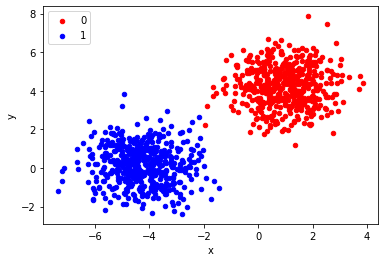

In [2]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state = 3)
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

fig, ax = plt.subplots()
grouped = df.groupby('label')
colors = {0:'red', 1:'blue', 2:'green', 3: 'black'}
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [4]:
class LDA():
    
    def __init__(self, xtrain, ytrain):
        
        self.xtrain = xtrain
        self.ytrain = ytrain
    
    def get_class_data(self):
        
        self.class_data = {}
        for cls in self.ytrain.unique():
            idx = self.ytrain[self.ytrain == cls].index
            self.class_data[cls] = self.xtrain.loc[idx, :]
    
    def get_prior(self):
        
        self.class_prior = {}
        for cls in self.ytrain.unique():
            self.class_prior[cls] = len(self.ytrain[self.ytrain == cls])/len(self.ytrain)
    
    def get_class_mean(self):
        
        self.class_mean = {}
        for cls in self.class_data:
            self.class_mean[cls] = np.array(self.class_data[cls].mean())
        
    def get_covariance(self):
        
        self.class_cov = {}
        for cls in self.class_data:
            self.class_cov[cls] = np.cov(np.array(self.class_data[cls]).T)
        ncov = [len(self.class_data[cls])*self.class_cov[cls] for cls in self.class_data]
        com_cov = 1/len(self.xtrain)*sum(ncov)
        self.cov_inv = inv(com_cov)
        
    def predict(self, x):
        
        pos = [(x.T @ self.cov_inv @ self.class_mean[cls]) - (0.5 * self.class_mean[cls].T @ self.cov_inv @ self.class_mean[cls])
               + np.log(self.class_prior[cls]) for cls in self.class_data]
        ypred = np.argmax(pos)
  
        return ypred
    
    def train(self):
 
        self.get_class_data()
        self.get_prior()
        self.get_class_mean()
        self.get_covariance()

    def plot_decision_boundary(self):
        
        min1, max1 = self.xtrain.iloc[:,0].min() - 1, self.xtrain.iloc[:,0].max() + 1
        min2, max2 = self.xtrain.iloc[:,1].min() - 1, self.xtrain.iloc[:,1].max() + 1
        
        x1grid = np.arange(min1, max1, 0.1)
        x2grid = np.arange(min2, max2, 0.1)
        xx, yy = np.meshgrid(x1grid, x2grid)
        r1, r2 = xx.flatten(), yy.flatten()
        r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
        grid = np.hstack((r1,r2))
        
        yhat = [self.predict(g) for g in grid]
        zz = np.array(yhat).reshape(xx.shape)
        
        plt.figure(figsize=(10,10))
        plt.contourf(xx, yy, zz, cmap='Paired')
        for cls in self.class_data:
            idx = self.ytrain[self.ytrain == cls].index
            plt.scatter(self.xtrain.iloc[idx, 0], self.xtrain.iloc[idx, 1], cmap='Paired')


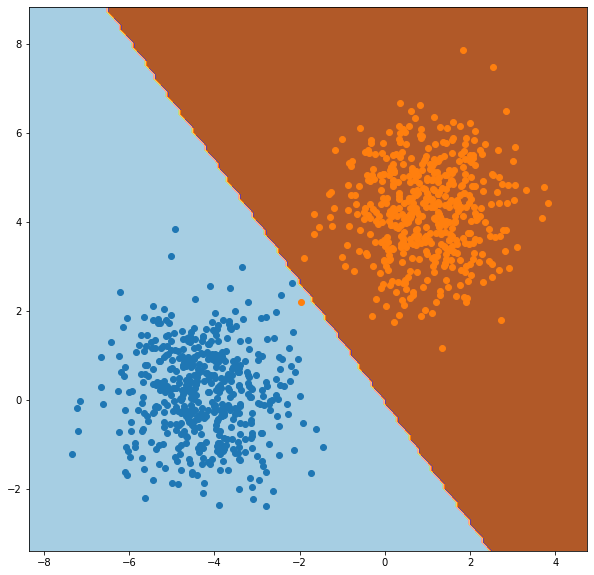

In [5]:
lda = LDA(df[['x', 'y']], df['label'])
lda.train()
lda.plot_decision_boundary()
